In [2]:
import pandas as pd
import numpy as np

In [3]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/Lio/Desktop/Machine_learing/playground-series-s5e5/train.csv")
print(df.shape)
df.head()
#df 변수 지정 후 head()를 통해 5행까지 데이터 확인

(750000, 9)


,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [4]:
train = df.info()
print(train)
# count에 non-null로 결측치 없는 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB
None


In [5]:
train2 = df.describe()
print(train2)
# describe()를 통해 데이터들의 정보 파악(평균 키, 나이, 몸무게, 운동 지속시간 등)

                  id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000     174.000000      74.000000   
75%    562499.250000      52.000000     185.000000      87.000000   
max    749999.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000   

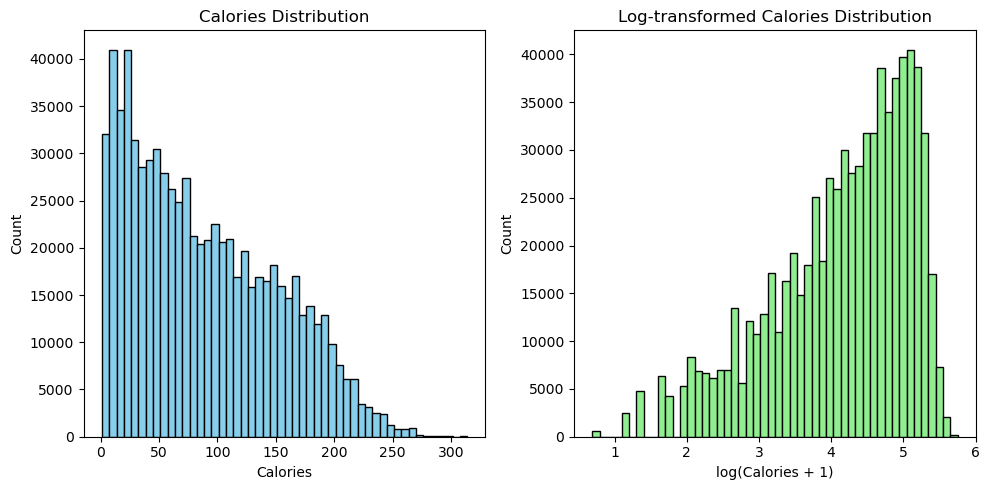

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Calories'], bins=50, color='skyblue', edgecolor='black')
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(df['Calories']), bins=50, color='lightgreen', edgecolor='black')
plt.title('Log-transformed Calories Distribution')
plt.xlabel('log(Calories + 1)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#목표 타켓인 칼로리의 분포를 확인하고, 긴꼬리 분포를 확인(왼쪽 그래프) -> 로그 변환 후의 그래프도 확인

In [7]:

gender_stats = df.groupby('Sex')[['Height', 'Weight', 'Duration', 'Heart_Rate', 'Calories']].agg(['mean', 'std'])
print("Gender-based Statistics:")
print(gender_stats)

print("\nGender Distribution:")
print(df['Sex'].value_counts())

#남여로 나누어 데이터 확인 -> 생물학적인 남녀의 신체적인 차이 외에 운동 지속시간, 심박수 등 큰 차이 없음

Gender-based Statistics:
            Height               Weight             Duration            \
              mean       std       mean       std       mean       std   
Sex                                                                      
female  165.022200  8.198525  63.726300  7.011194  15.501013  8.256757   
male    184.410448  8.589572  86.609032  8.951300  15.340708  8.449930   

       Heart_Rate             Calories             
             mean       std       mean        std  
Sex                                                
female  95.397955  9.406330  87.534761  57.905734  
male    95.570366  9.492556  89.033683  66.590171  

Gender Distribution:
Sex
female    375721
male      374279
Name: count, dtype: int64


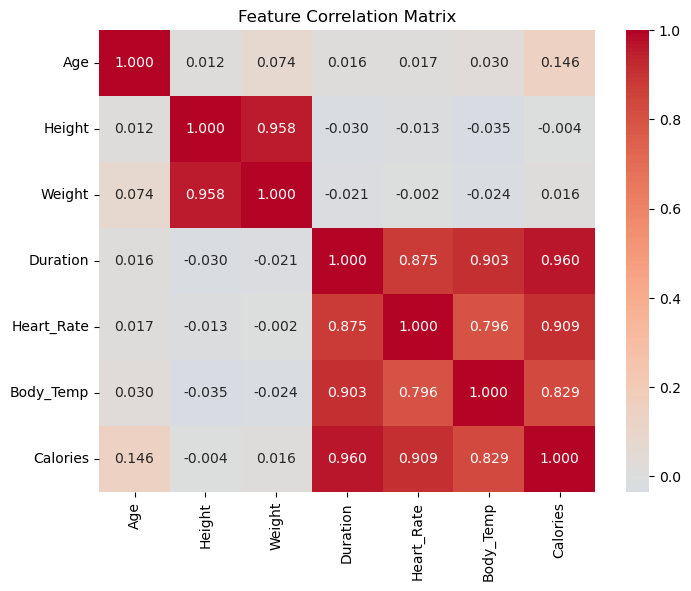


Correlations with Calories:
Calories      1.000000
Duration      0.959908
Heart_Rate    0.908748
Body_Temp     0.828671
Age           0.145683
Weight        0.015863
Height       -0.004026
Name: Calories, dtype: float64


In [8]:
import seaborn as sns

# Calculate correlation matrix
corr = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Feature Correlation Matrix')
plt.show()

# Print correlations with target
print("\nCorrelations with Calories:")
print(corr['Calories'].sort_values(ascending=False))

#각 변수들 간의 상관관계 분석 결과 칼로리와 운동 지속시간, 심박수,  체온이 가장 큰 상관관계를 나타내고 있었음
# 운동 지속 시간 0.960, 심박수 0.909, 체온 0.829

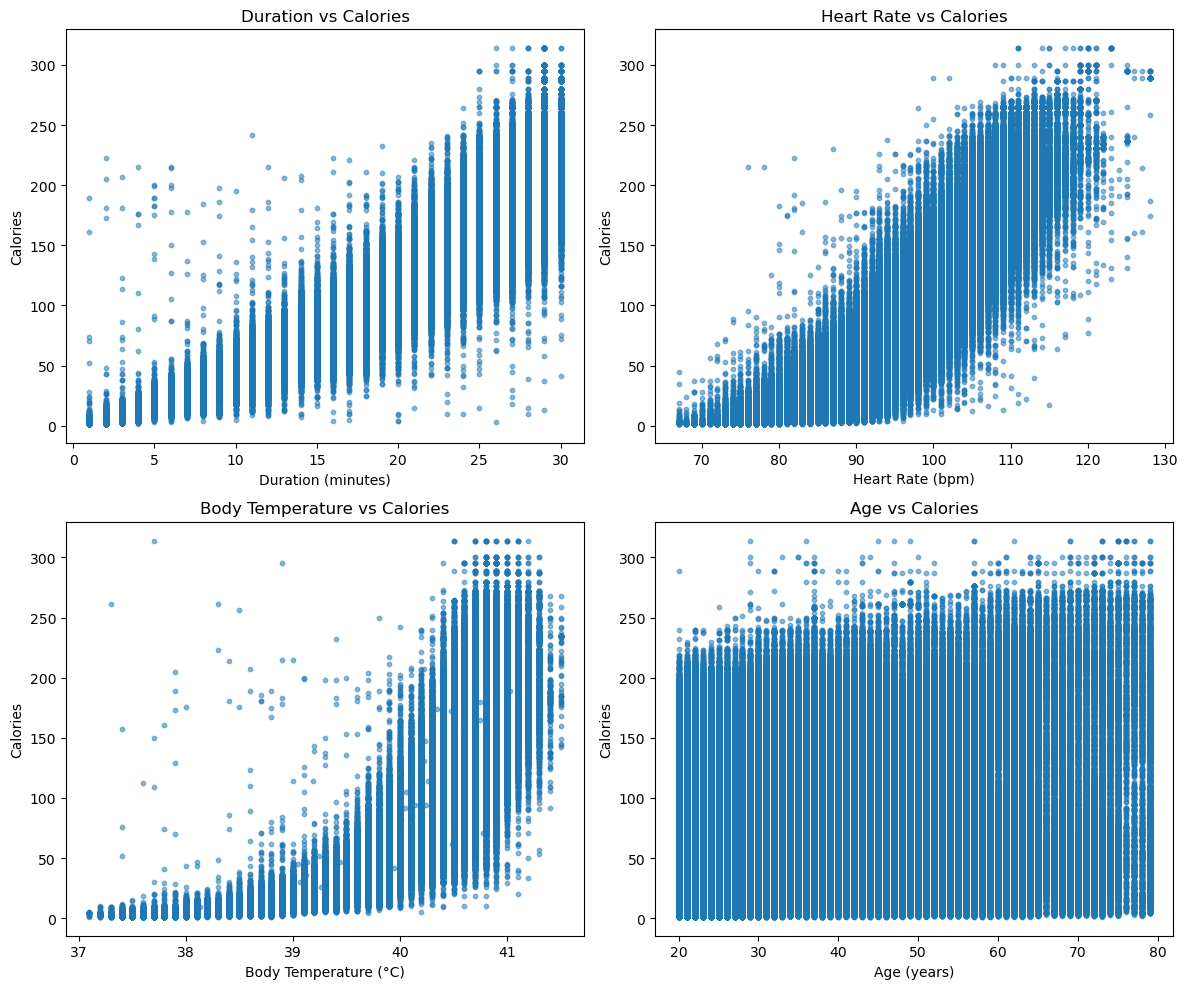

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Duration vs Calories
axes[0, 0].scatter(df['Duration'], df['Calories'], alpha=0.5, s=10)
axes[0, 0].set_xlabel('Duration (minutes)')
axes[0, 0].set_ylabel('Calories')
axes[0, 0].set_title('Duration vs Calories')

# Heart_Rate vs Calories
axes[0, 1].scatter(df['Heart_Rate'], df['Calories'], alpha=0.5, s=10)
axes[0, 1].set_xlabel('Heart Rate (bpm)')
axes[0, 1].set_ylabel('Calories')
axes[0, 1].set_title('Heart Rate vs Calories')

# Body_Temp vs Calories
axes[1, 0].scatter(df['Body_Temp'], df['Calories'], alpha=0.5, s=10)
axes[1, 0].set_xlabel('Body Temperature (°C)')
axes[1, 0].set_ylabel('Calories')
axes[1, 0].set_title('Body Temperature vs Calories')

# Age vs Calories
axes[1, 1].scatter(df['Age'], df['Calories'], alpha=0.5, s=10)
axes[1, 1].set_xlabel('Age (years)')
axes[1, 1].set_ylabel('Calories')
axes[1, 1].set_title('Age vs Calories')

plt.tight_layout()
plt.show()

#위의 Heatmap에서도 확인한 것처럼 Scatter plot에서도 Duration, Heart Rate, Body Temperature의 선형 관계 확인
#마찬가지로 Age는 관계성을 찾기 어려움

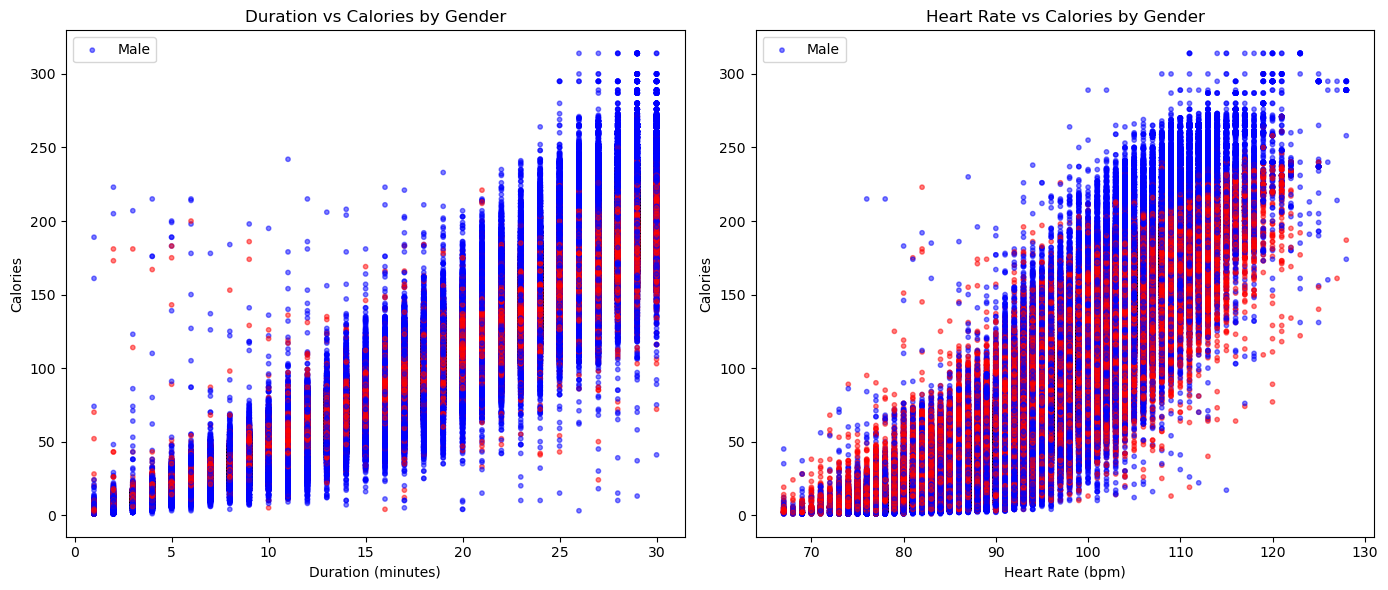

In [11]:
# Create color map for gender
colors = df['Sex'].map({'male': 'blue', 'female': 'red'})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Duration vs Calories by gender
axes[0].scatter(df['Duration'], df['Calories'], c=colors, alpha=0.5, s=10)
axes[0].set_xlabel('Duration (minutes)')
axes[0].set_ylabel('Calories')
axes[0].set_title('Duration vs Calories by Gender')
axes[0].legend(['Male', 'Female'])

# Heart_Rate vs Calories by gender
axes[1].scatter(df['Heart_Rate'], df['Calories'], c=colors, alpha=0.5, s=10)
axes[1].set_xlabel('Heart Rate (bpm)')
axes[1].set_ylabel('Calories')
axes[1].set_title('Heart Rate vs Calories by Gender')
axes[1].legend(['Male', 'Female'])

plt.tight_layout()
plt.show()

#Calories와 Duration 관계는 위와 같이 강한 관계를 보이고, Heart Rate 역시 강한 관계성을 보임

In [12]:
# Check extreme values
print("Top 10 Highest Calorie Records:")
print(df.nlargest(10, 'Calories')[['Sex', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']])

print("\nTop 10 Lowest Calorie Records:")
print(df.nsmallest(10, 'Calories')[['Sex', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']])

# Statistical outlier detection using IQR
Q1 = df['Calories'].quantile(0.25)
Q3 = df['Calories'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Calories'] < lower_bound) | (df['Calories'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

#위에서 봤던 데이터 결과대로 Calories는 Duration, Heart_rate, Body_Temp와 강한 관계성을 보임(age는 전혀 상관없음)
 # -> 하지만 상위 10 Calorie Records에 모든 성별이 male인 것으로 보아 극한의 운동 상황에서는 남성이 앞설 수 있다는 점
 # -> Calories는 최대값이 314로 제한된 것으로 보임
 # -> Number of Outliers는 0.02%로 매우 낮은 이상치 비율을 보임

Top 10 Highest Calorie Records:
         Sex  Age  Duration  Heart_Rate  Body_Temp  Calories
46431   male   49      29.0       120.0       40.8     314.0
68802   male   29      29.0       120.0       40.7     314.0
82351   male   73      29.0       111.0       41.0     314.0
86484   male   75      26.0       123.0       40.5     314.0
86596   male   36      29.0       117.0       40.8     314.0
108644  male   47      29.0       120.0       40.9     314.0
120117  male   57      29.0       119.0       40.8     314.0
174139  male   69      29.0       119.0       40.7     314.0
183884  male   75      28.0       123.0       40.8     314.0
184638  male   79      28.0       123.0       41.0     314.0

Top 10 Lowest Calorie Records:
          Sex  Age  Duration  Heart_Rate  Body_Temp  Calories
1767   female   29       1.0        70.0       37.9       1.0
5864     male   24       1.0        74.0       37.7       1.0
8826   female   26       1.0        75.0       37.7       1.0
9223   female   3

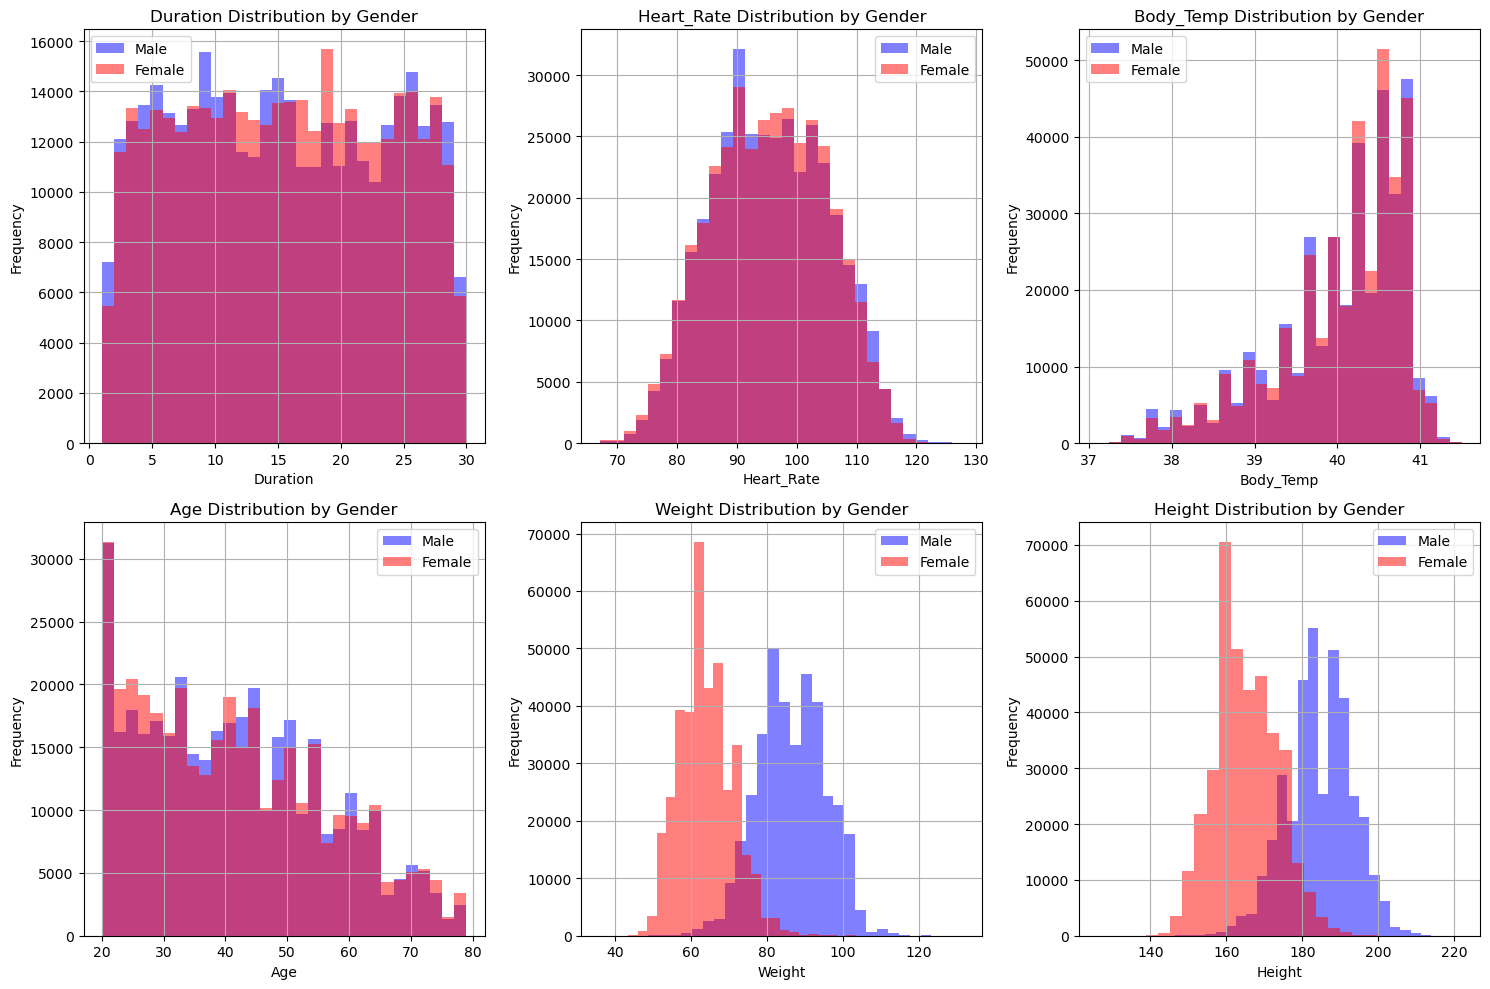

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

features = ['Duration', 'Heart_Rate', 'Body_Temp', 'Age', 'Weight', 'Height']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    df[df['Sex'] == 'male'][feature].hist(bins=30, alpha=0.5, label='Male', 
                                          ax=axes[row, col], color='blue')
    df[df['Sex'] == 'female'][feature].hist(bins=30, alpha=0.5, label='Female', 
                                            ax=axes[row, col], color='red')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'{feature} Distribution by Gender')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

#역시나 Duration, Heart_Rate, Body_Temp는 강한 상관관계를 보이고 있음
#Age에서는 20~30대의 운동 참여가 많음
#Weigt,Height 남녀의 생물학적인 차이로 볼 수 있음
# -> 결과적으로 나이와 신체적인 차이에 상관없이 노력으로 비슷한 칼로리를 소모한다고 볼 수 있음

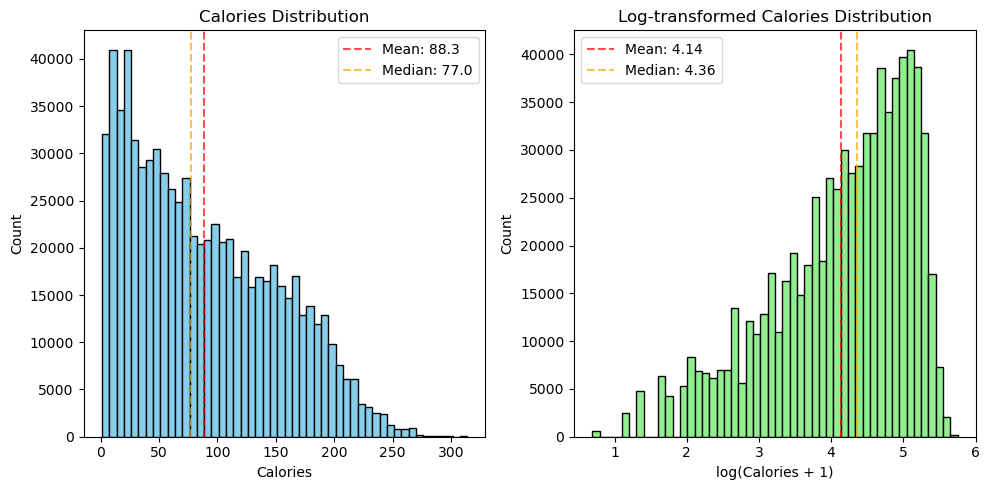

원본 칼로리:
평균: 88.28
중앙값: 77.00
표준편차: 62.40
왜도: 0.539
--------------------------
로그 변환 후:
평균: 4.141
중앙값: 4.357
표준편차: 0.963
왜도: -0.857
테스트 RMSLE: 0.0928


In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Calories'], bins=50, color='skyblue', edgecolor='black')
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Count')

mean_cal = df['Calories'].mean()
median_cal = df['Calories'].median()
plt.axvline(mean_cal, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_cal:.1f}')
plt.axvline(median_cal, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_cal:.1f}')
plt.legend()

plt.subplot(1, 2, 2)
log_calories = np.log1p(df['Calories'])
plt.hist(log_calories, bins=50, color='lightgreen', edgecolor='black')
plt.title('Log-transformed Calories Distribution')
plt.xlabel('log(Calories + 1)')
plt.ylabel('Count')

mean_log = log_calories.mean()
median_log = log_calories.median()
plt.axvline(mean_log, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_log:.2f}')
plt.axvline(median_log, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_log:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print("원본 칼로리:")
print(f"평균: {df['Calories'].mean():.2f}")
print(f"중앙값: {df['Calories'].median():.2f}")  
print(f"표준편차: {df['Calories'].std():.2f}")
print(f"왜도: {df['Calories'].skew():.3f}")
print("--------------------------")
print("로그 변환 후:")
print(f"평균: {log_calories.mean():.3f}")
print(f"중앙값: {log_calories.median():.3f}")
print(f"표준편차: {log_calories.std():.3f}")
print(f"왜도: {log_calories.skew():.3f}")

y_true_sample = df['Calories'].head(100)
y_pred_sample = y_true_sample * 1.1
test_rmsle = rmsle(y_true_sample, y_pred_sample)
print(f"테스트 RMSLE: {test_rmsle:.4f}")

# Calories 타켓 변수가 오른쪽 치우침(0.539)으로 로그 변환 진행 -> 왼쪽 치우침 생김
# RMSLE 함수 테스트(10%오차) 결과 0.0928 확인
# Duration 상관관계 0.96기반 베이스라인 모델만으로도 높은 성능 기대